In [1]:
%matplotlib inline

from dicom_utils import *
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
#import assd_func as af
from skimage import morphology
import matplotlib.patches as mpatches
import assd_func_Sobel_2 as af_Sobel
import time
import random
from scipy.stats import uniform,norm

In [2]:
organ = "rectum" #Change this your organ

In [3]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/1"
organ_i = 4
output_dir = "Output"
images_1, slices_1, contours_1, labels_1, dummy_mask_1 = main(dicom_dir, output_dir)

In [4]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/3"
output_dir = "Output"
images_3, slices_3, contours_3, labels_3, dummy_mask_3 = main(dicom_dir, output_dir)

In [5]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/4"
output_dir = "Output"
images_4, slices_4, contours_4, labels_4, dummy_mask_4 = main(dicom_dir, output_dir)

   Missing contours for structure: sigmoid


In [6]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/5"
output_dir = "Output"
images_5, slices_5, contours_5, labels_5, dummy_mask_5 = main(dicom_dir, output_dir)

   Missing contours for structure: CTV_
   Missing contours for structure: SeminalVes_Dist
   Missing contours for structure: Hot Spot 7210 cGy (Rectum)
   Missing contours for structure: Hot Spot 7350 cGy (Total PTV)


In [7]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/6"
output_dir = "Output"
images_6, slices_6, contours_6, labels_6, dummy_mask_6 = main(dicom_dir, output_dir)

In [8]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/7"
output_dir = "Output"
images_7, slices_7, contours_7, labels_7, dummy_mask_7 = main(dicom_dir, output_dir)

In [9]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/8"
output_dir = "Output"
images_8, slices_8, contours_8, labels_8, dummy_mask_8 = main(dicom_dir, output_dir)

In [10]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/9"
output_dir = "Output"
images_9, slices_9, contours_9, labels_9, dummy_mask_9 = main(dicom_dir, output_dir)

In [11]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/10"
output_dir = "Output"
images_10, slices_10, contours_10, labels_10, dummy_mask_10 = main(dicom_dir, output_dir)

   Missing contours for structure: ROI_1


# Rectum

In [12]:
len(contours_1)

25

In [13]:
def find_roi_slices(images, labels, i):
    roi_z = []
    for j in range(images.shape[0]):
        if True in np.unique(labels[..., i][j, ...] > 0):
            roi_z.append(j)
    return roi_z

def find_organ_i(organ, contours):
    contour_table = pd.DataFrame()
    number = []
    name = []
    for i in range(len(contours)):
        number.append(contours[i]["number"])
        name.append(contours[i]["name"])
    #contour_table["number"] = number
    contour_table["name"] = name
    #print(contour_table)
    organ_i =  contour_table[contour_table["name"].str.contains(organ)].index.tolist()[0]
    return organ_i

In [14]:
organ_i_1 =  find_organ_i(organ, contours_1)
organ_i_1

4

In [15]:
roi_z_1 = find_roi_slices(images_1, labels_1, organ_i_1)

(-0.5, 511.5, 511.5, -0.5)

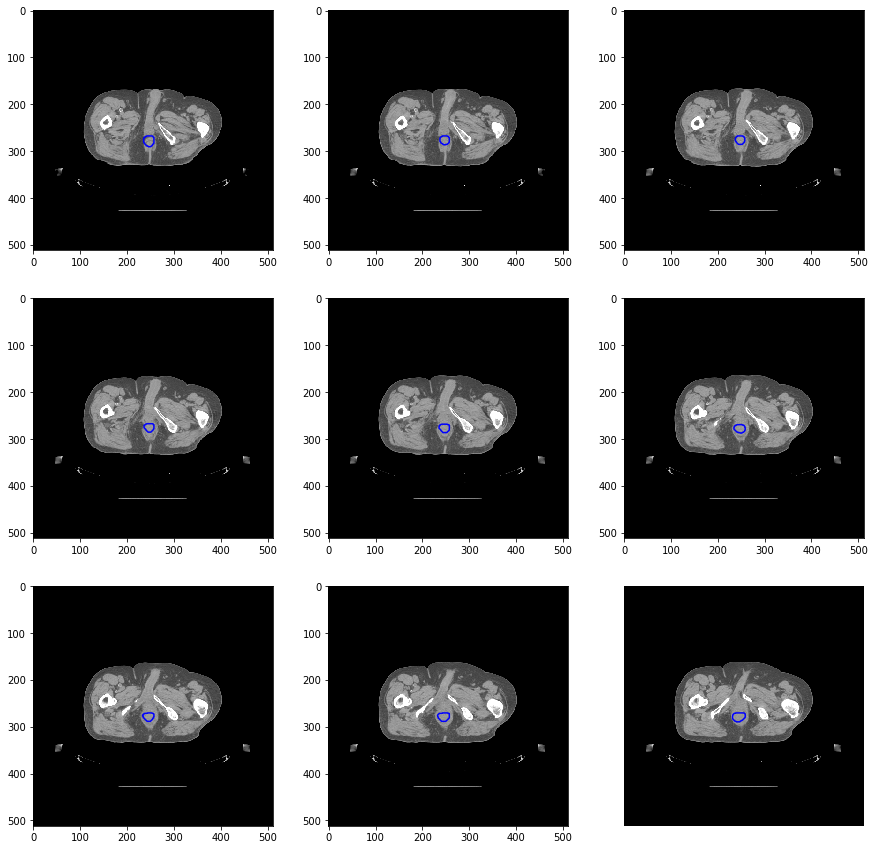

In [16]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_1[i + roi_z_1[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_1[..., organ_i_1][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_2[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_2[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [17]:
organ_i_3 =  find_organ_i(organ, contours_3)
organ_i_3

4

In [18]:
roi_z_3 = find_roi_slices(images_3, labels_3, organ_i_3)

(-0.5, 511.5, 511.5, -0.5)

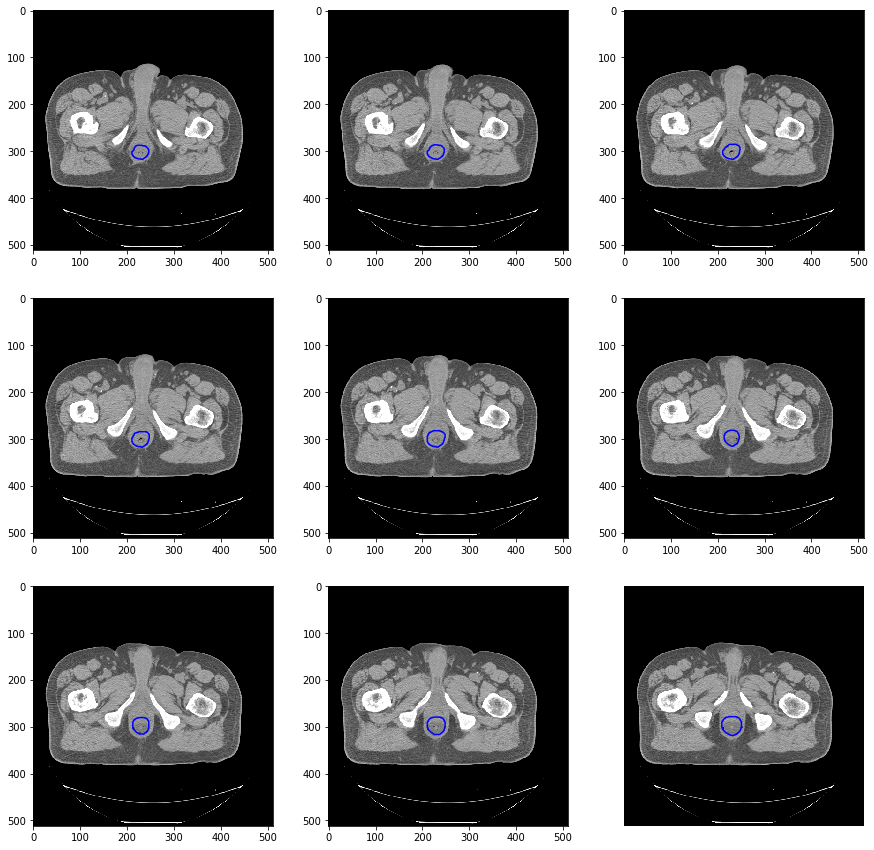

In [19]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_3[i + roi_z_3[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_3[..., organ_i_3][i + roi_z_3[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [20]:
organ_i_4 =  find_organ_i(organ, contours_4)
organ_i_4

7

In [21]:
roi_z_4 = find_roi_slices(images_4, labels_4, organ_i_4)

(-0.5, 511.5, 511.5, -0.5)

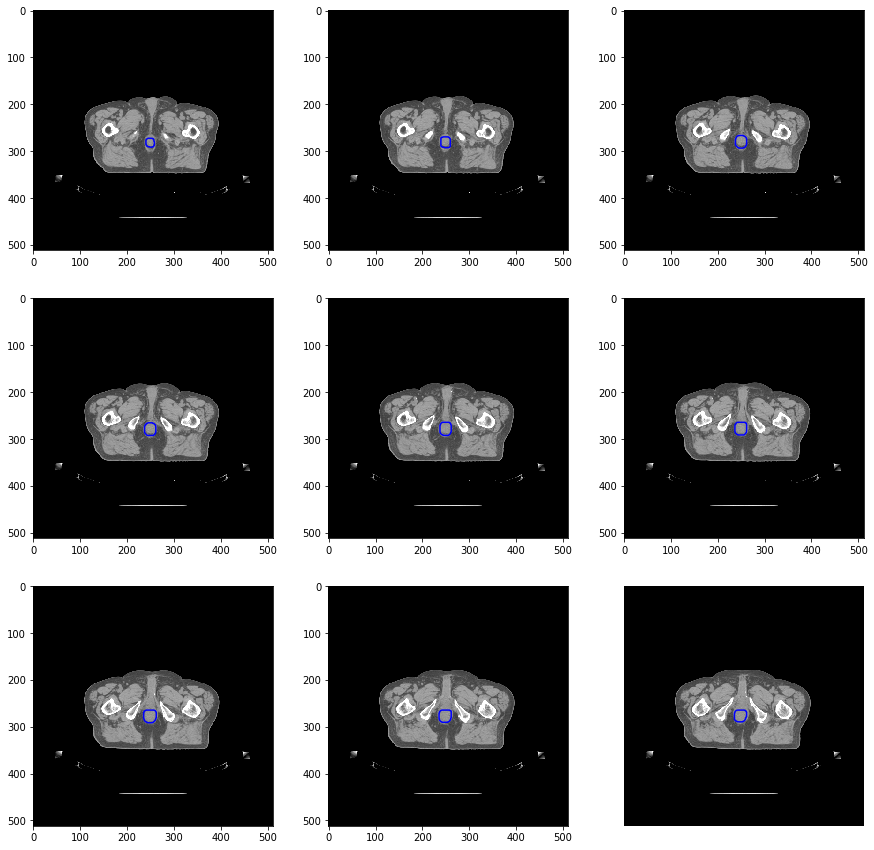

In [22]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_4[i + roi_z_4[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_4[..., organ_i_4][i + roi_z_4[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [23]:
organ_capital = "Rectum"
organ_i_5 =  find_organ_i(organ_capital, contours_5)
organ_i_5 

8

In [24]:
roi_z_5 = find_roi_slices(images_5, labels_5, organ_i_5)

(200.0, 270.0, 360.0, 270.0)

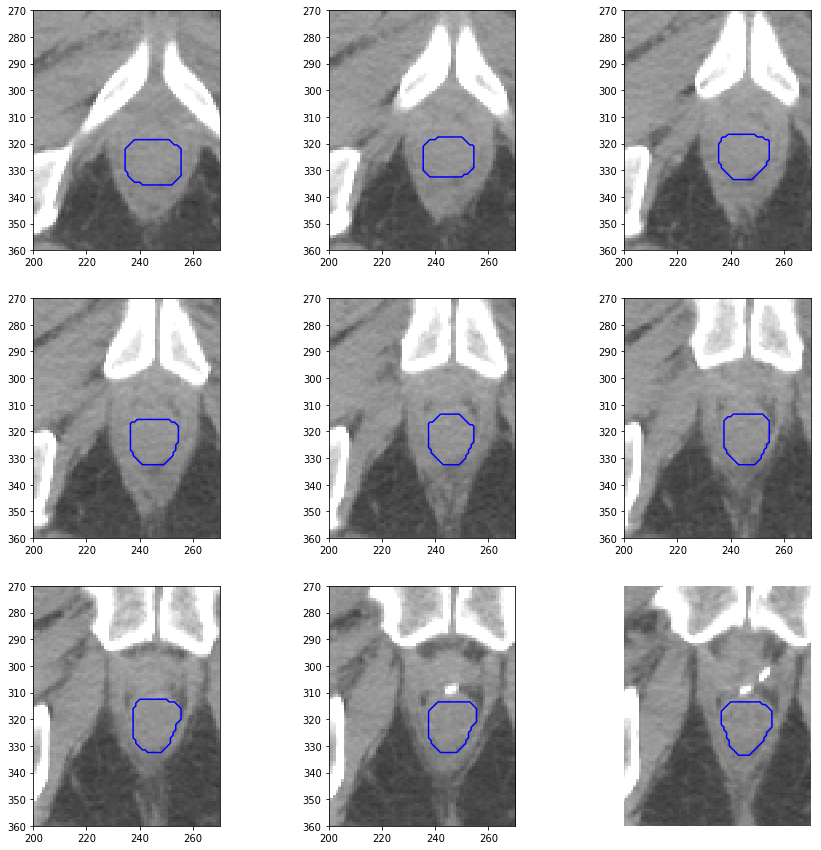

In [25]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_5[i + roi_z_5[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_5[..., organ_i_5][i + roi_z_5[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 270)
    plt.ylim(360, 270)
plt.axis('off')

In [26]:
organ_i_6 =  find_organ_i(organ, contours_6)
organ_i_6

4

In [27]:
roi_z_6 = find_roi_slices(images_6, labels_6, organ_i_6)

(-0.5, 511.5, 511.5, -0.5)

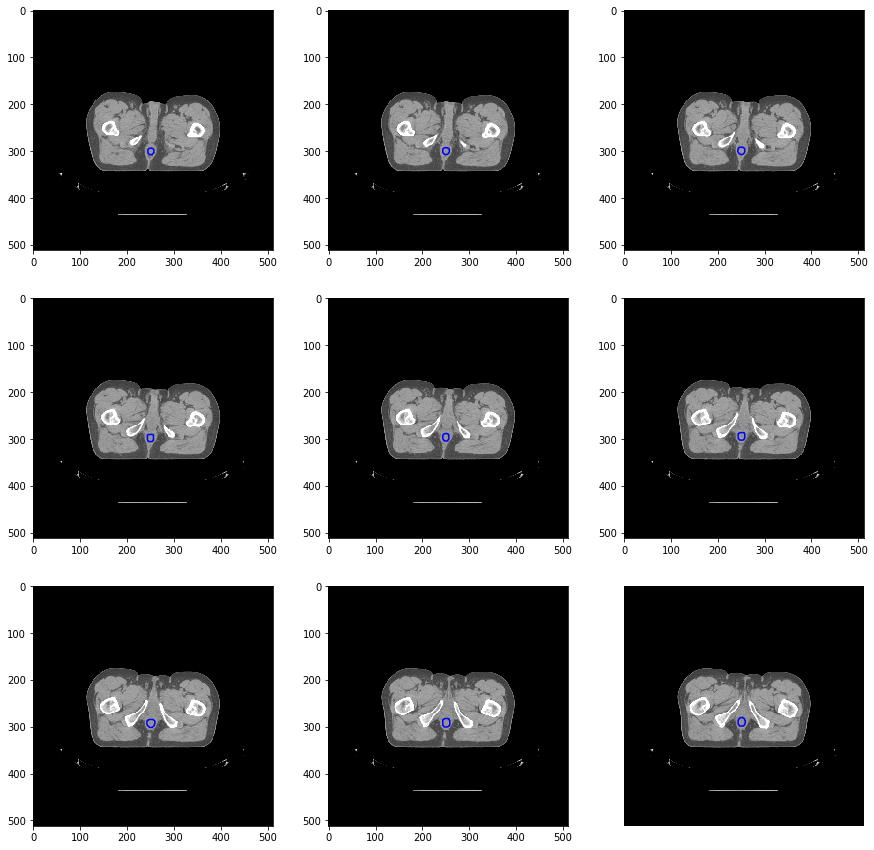

In [28]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_6[i + roi_z_6[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_6[..., organ_i_6][i + roi_z_6[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [29]:
organ_i_7 =  find_organ_i(organ, contours_7)
organ_i_7

2

In [30]:
roi_z_7 = find_roi_slices(images_7, labels_7, organ_i_7)

(-0.5, 511.5, 511.5, -0.5)

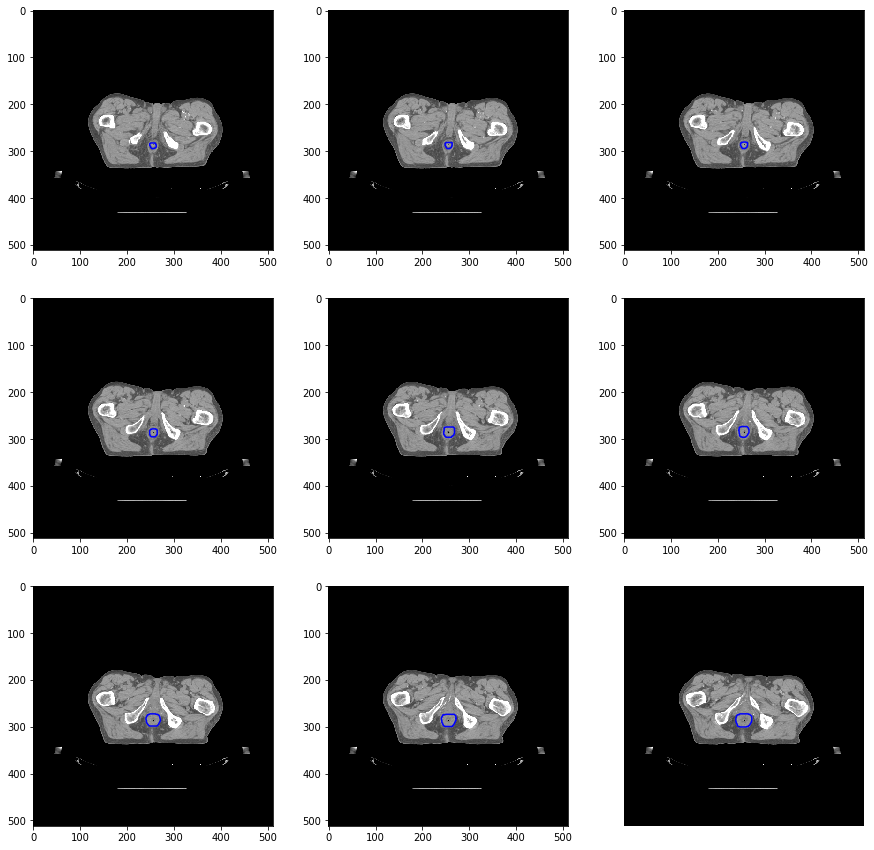

In [31]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_7[i + roi_z_7[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_7[..., organ_i_7][i + roi_z_7[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [32]:
organ_i_8 =  find_organ_i(organ, contours_8)
organ_i_8

6

In [33]:
roi_z_8 = find_roi_slices(images_8, labels_8, organ_i_8)

(-0.5, 511.5, 511.5, -0.5)

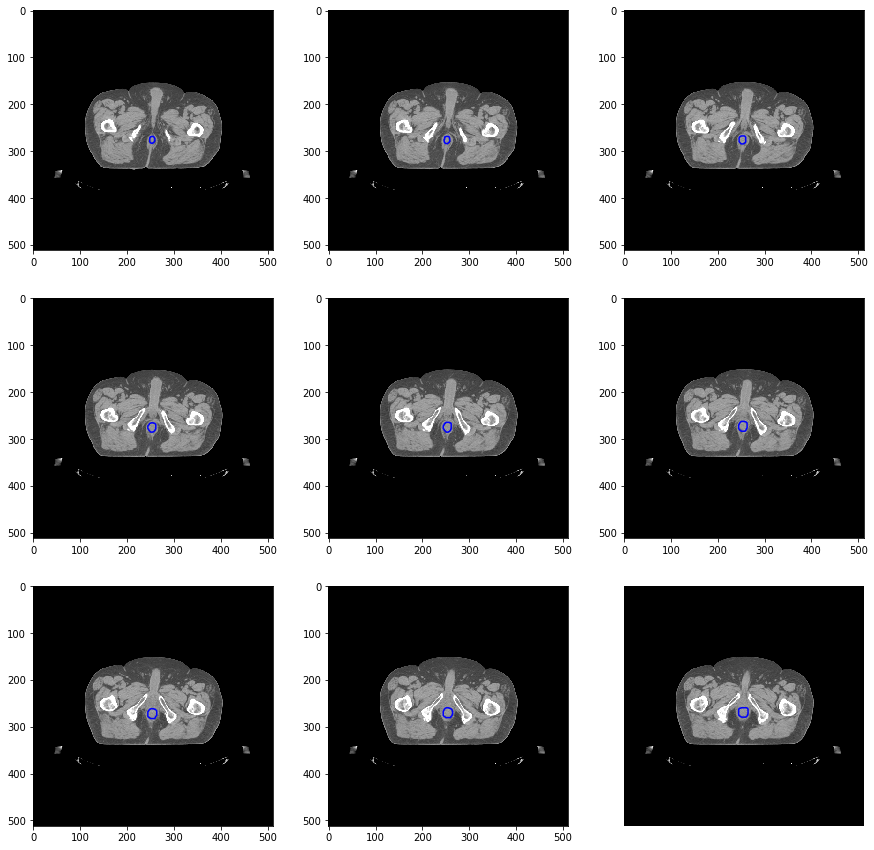

In [34]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_8[i + roi_z_8[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_8[..., organ_i_8][i + roi_z_8[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [35]:
organ_i_9 =  find_organ_i(organ, contours_9)
organ_i_9

2

In [36]:
roi_z_9 = find_roi_slices(images_9, labels_9, organ_i_9)

(-0.5, 511.5, 511.5, -0.5)

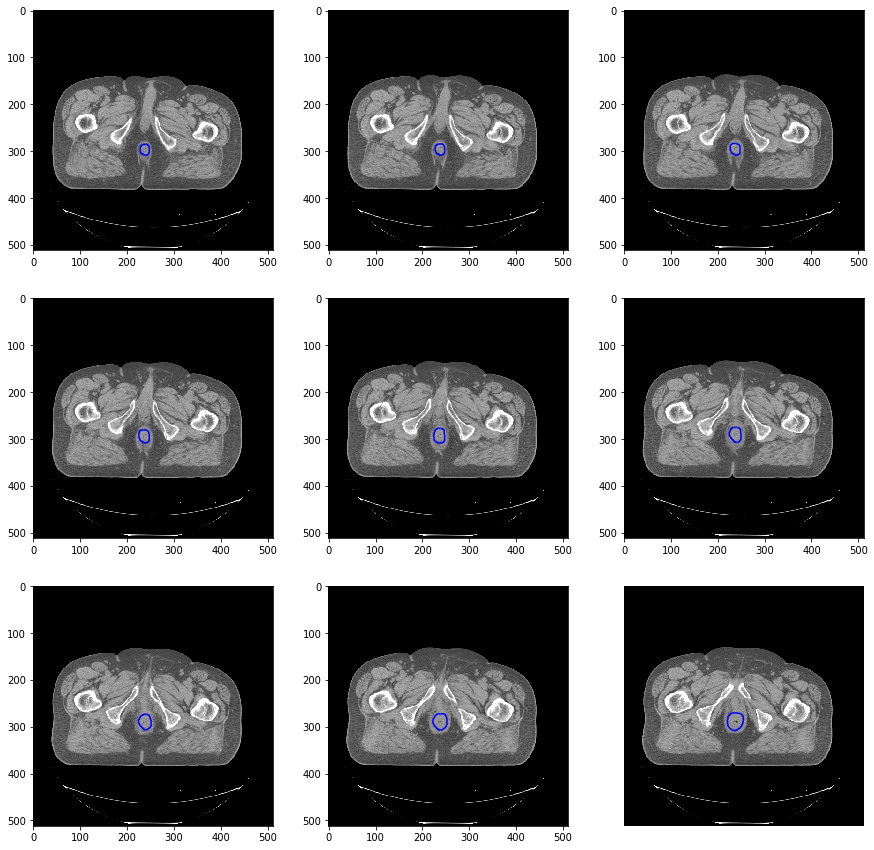

In [37]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_9[i + roi_z_9[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_9[..., organ_i_9][i + roi_z_9[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [38]:
organ_i_10 =  find_organ_i(organ, contours_10)
organ_i_10

9

In [39]:
roi_z_10 = find_roi_slices(images_10, labels_10, organ_i_10)

(-0.5, 511.5, 511.5, -0.5)

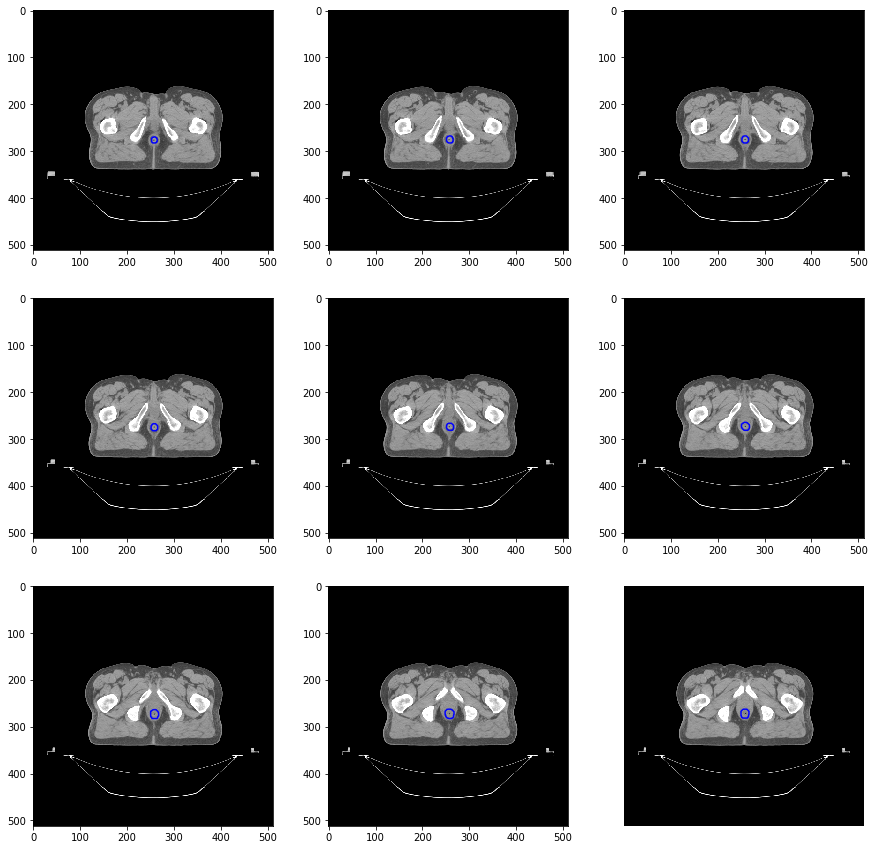

In [40]:
organ_i = 4
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_10[i + roi_z_10[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_10[..., organ_i_10][i + roi_z_10[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

## Different slides

(280.0, 230.0, 320.0, 260.0)

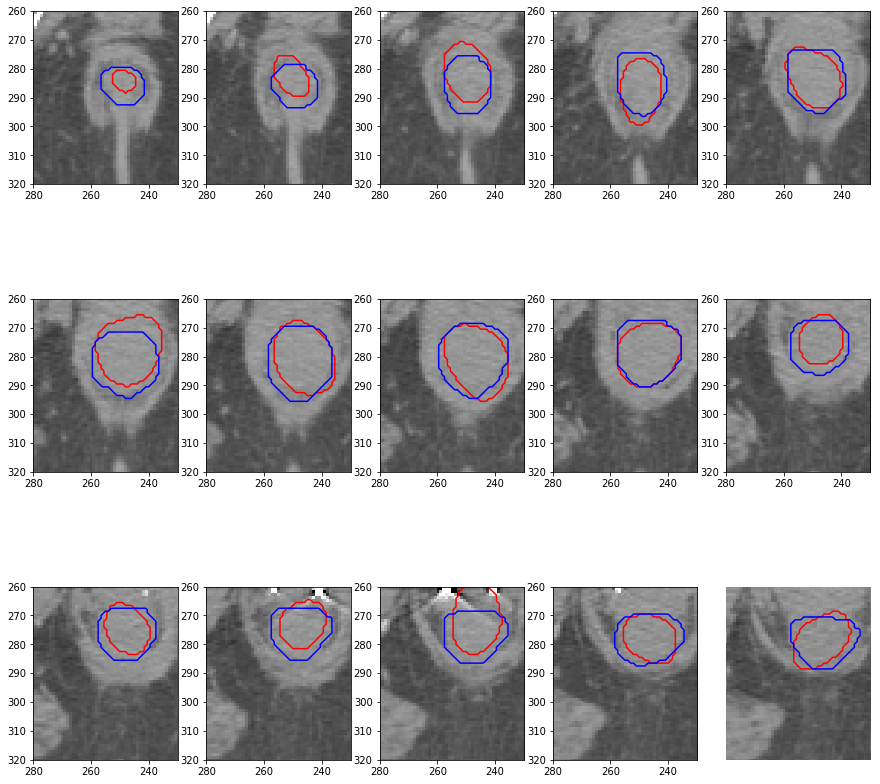

In [41]:
c = 20
k = 10
w = 2
circles = 3
ismax=True
a = 50
SD=[c*1.3, c*1.3, c*3]
voxelsize = np.array([0.1076562, 0.1076562, 2.5])
assd_contour_rectum_1 = labels_1[..., organ_i_1].copy()
seed = 72

for i in roi_z_1:
    dx, dy, mask1, t, L, roi_z_1 = af_Sobel.assd_Sobel(images_1[i, ...], labels_1[..., organ_i_1][i, ...], voxelsize, a, SD, circles, seed, k, w, images_1, labels_1, organ_i_1, ismax=ismax, smooth=True)
    du1 = af_Sobel.plotting_assd(dx, dy, mask1, images_1[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_1[i, ...] = du1  
assd_contour_rectum_1 = np.array(assd_contour_rectum_1)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_1[roi_z_1[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_1[roi_z_1[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_1[..., organ_i_1][roi_z_1[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(280, 230)
    plt.ylim(320, 260)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

(300.0, 150.0, 350.0, 250.0)

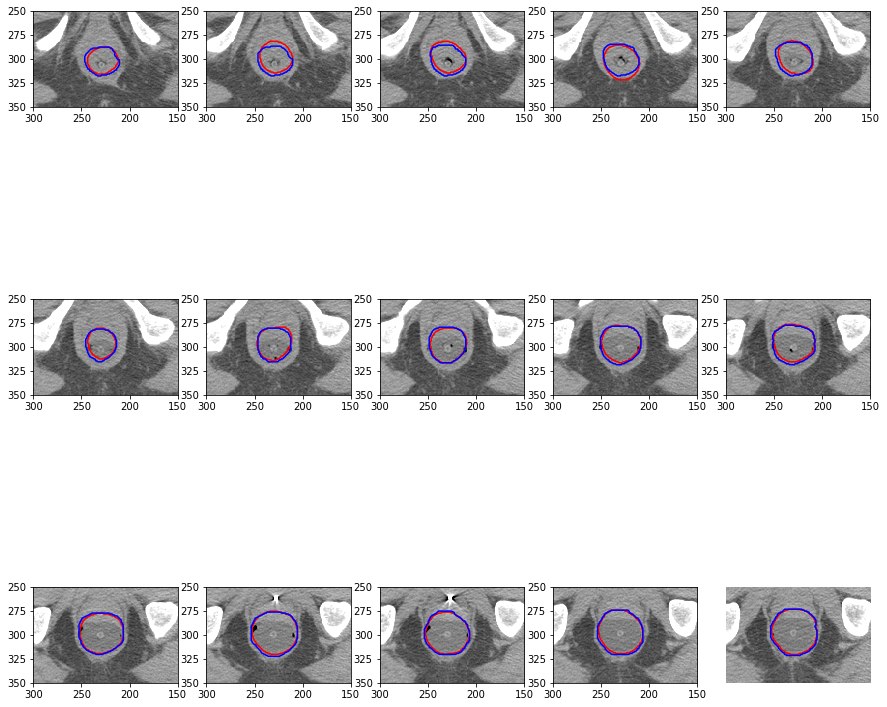

In [42]:
k = 15
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_rectum_3 = labels_3[..., organ_i_3].copy()

for i in roi_z_3:
    dx, dy, mask3, t, L, roi_z_3 = af_Sobel.assd_Sobel(images_3[i, ...], labels_3[..., organ_i_3][i, ...], voxelsize, a, SD, circles, seed, k, w, images_3, labels_3, organ_i_3, ismax=ismax, smooth=True)
    du3 = af_Sobel.plotting_assd(dx, dy, mask3, images_3[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_3[i, ...] = du3  
assd_contour_rectum_3 = np.array(assd_contour_rectum_3)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_3[roi_z_3[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_3[roi_z_3[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_3[..., organ_i_3][roi_z_3[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(300, 150)
    plt.ylim(350, 250)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

(200.0, 300.0, 320.0, 250.0)

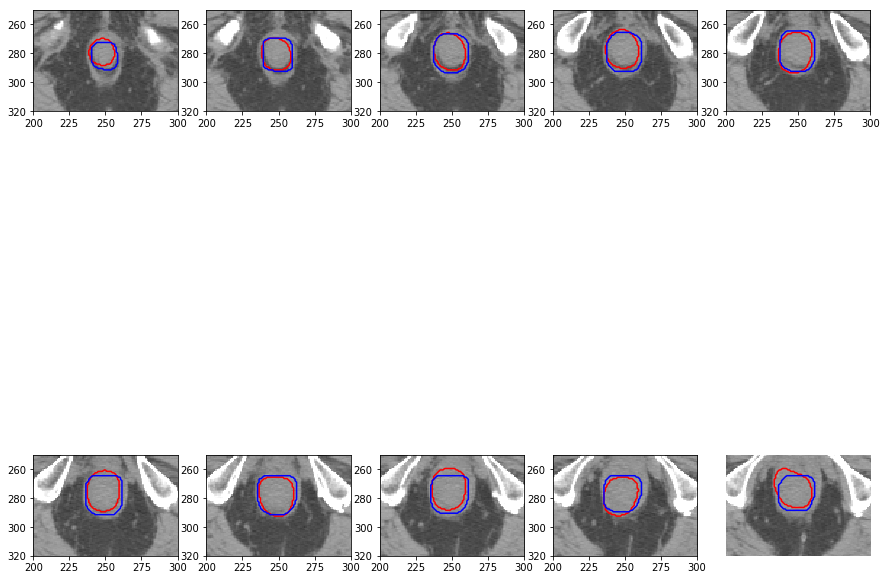

In [43]:
k = 15
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_rectum_4 = labels_4[..., organ_i_4].copy()

for i in roi_z_4:
    dx, dy, mask4, t, L, roi_z_4 = af_Sobel.assd_Sobel(images_4[i, ...], labels_4[..., organ_i_4][i, ...], voxelsize, a, SD, circles, seed, k, w, images_4, labels_4, organ_i_4, ismax=ismax, smooth=True)
    du4 = af_Sobel.plotting_assd(dx, dy, mask4, images_4[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_4[i, ...] = du4  
assd_contour_rectum_4 = np.array(assd_contour_rectum_4)

plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_4[roi_z_4[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_4[roi_z_4[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_4[..., organ_i_4][roi_z_4[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(320, 250)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

(200.0, 270.0, 360.0, 270.0)

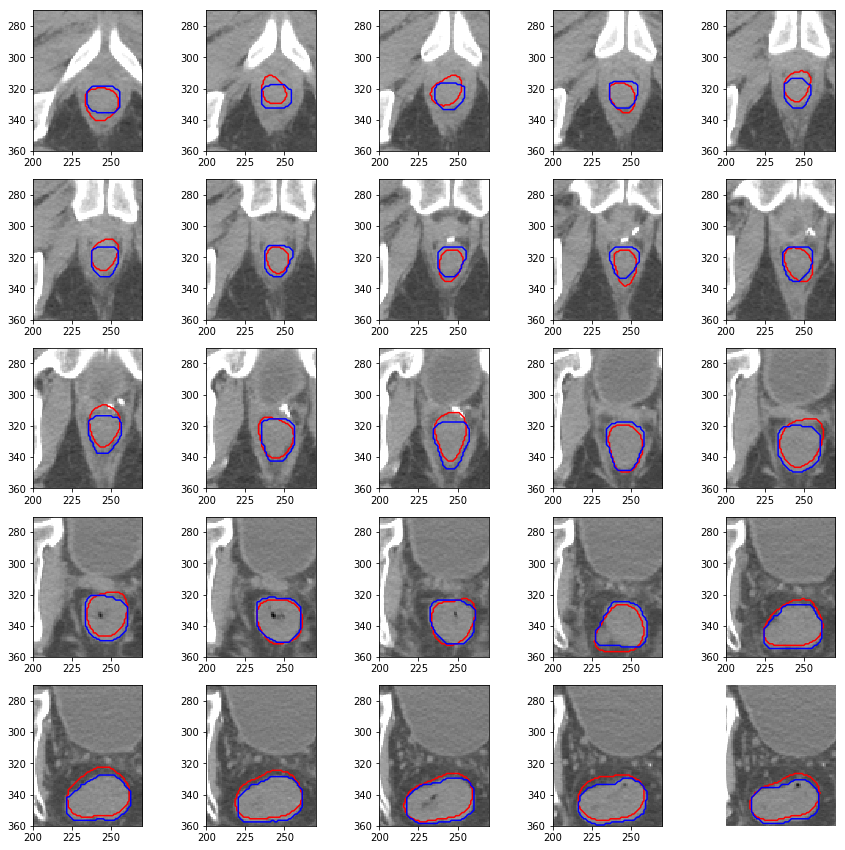

In [45]:
k = 15
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_rectum_5 = labels_5[..., organ_i_5].copy()

for i in roi_z_5:
    dx, dy, mask5, t, L, roi_z_5 = af_Sobel.assd_Sobel(images_5[i, ...], labels_5[..., organ_i_5][i, ...], voxelsize, a, SD, circles, seed, k, w, images_5, labels_5, organ_i_5, ismax=ismax, smooth=True)
    du5 = af_Sobel.plotting_assd(dx, dy, mask5, images_5[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_5[i, ...] = du5  
assd_contour_rectum_5 = np.array(assd_contour_rectum_5)

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images_5[roi_z_5[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_5[roi_z_5[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_5[..., organ_i_5][roi_z_5[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 270)
    plt.ylim(360, 270)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
k = 15
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_rectum_6 = labels_6[..., organ_i_6].copy()

for i in roi_z_6:
    dx, dy, mask6, t, L, roi_z_6 = af_Sobel.assd_Sobel(images_6[i, ...], labels_6[..., organ_i_6][i, ...], voxelsize, a, SD, circles, seed, k, w, images_6, labels_6, organ_i_6, ismax=ismax, smooth=True)
    du6 = af_Sobel.plotting_assd(dx, dy, mask6, images_6[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_6[i, ...] = du6  
assd_contour_rectum_6 = np.array(assd_contour_rectum_6)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_6[roi_z_6[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_6[roi_z_6[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_6[..., organ_i_6][roi_z_6[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(220, 270)
    plt.ylim(330, 270)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
k = 15
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_rectum_7 = labels_7[..., organ_i_7].copy()

for i in roi_z_7:
    dx, dy, mask7, t, L, roi_z_7 = af_Sobel.assd_Sobel(images_7[i, ...], labels_7[..., organ_i_7][i, ...], voxelsize, a, SD, circles, seed, k, w, images_7, labels_7, organ_i_7, ismax=ismax, smooth=True)
    du7 = af_Sobel.plotting_assd(dx, dy, mask7, images_7[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_7[i, ...] = du7  
assd_contour_rectum_7 = np.array(assd_contour_rectum_7)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_7[roi_z_7[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_7[roi_z_7[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_7[..., organ_i_7][roi_z_7[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(230, 280)
    plt.ylim(320, 260)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
k = 15
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_rectum_8 = labels_8[..., organ_i_8].copy()

for i in roi_z_8:
    dx, dy, mask8, t, L, roi_z_8 = af_Sobel.assd_Sobel(images_8[i, ...], labels_8[..., organ_i_8][i, ...], voxelsize, a, SD, circles, seed, k, w, images_8, labels_8, organ_i_8, ismax=ismax, smooth=True)
    du8 = af_Sobel.plotting_assd(dx, dy, mask8, images_8[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_8[i, ...] = du8  
assd_contour_rectum_8 = np.array(assd_contour_rectum_8)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_8[roi_z_8[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_8[roi_z_8[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_8[..., organ_i_8][roi_z_8[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(230, 280)
    plt.ylim(300, 240)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
k = 15
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_rectum_9 = labels_9[..., organ_i_9].copy()

for i in roi_z_9:
    dx, dy, mask9, t, L, roi_z_9 = af_Sobel.assd_Sobel(images_9[i, ...], labels_9[..., organ_i_9][i, ...], voxelsize, a, SD, circles, seed, k, w, images_9, labels_9, organ_i_9, ismax=ismax, smooth=True)
    du9 = af_Sobel.plotting_assd(dx, dy, mask9, images_9[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_9[i, ...] = du9  
assd_contour_rectum_9 = np.array(assd_contour_rectum_9)

plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_9[roi_z_9[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_9[roi_z_9[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_9[..., organ_i_9][roi_z_9[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
k = 15
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_rectum_10 = labels_10[..., organ_i_10].copy()

for i in roi_z_10:
    dx, dy, mask10, t, L, roi_z_10 = af_Sobel.assd_Sobel(images_10[i, ...], labels_10[..., organ_i_10][i, ...], voxelsize, a, SD, circles, seed, k, w, images_10, labels_10, organ_i_10, ismax=ismax, smooth=True)
    du10 = af_Sobel.plotting_assd(dx, dy, mask10, images_10[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_10[i, ...] = du10  
assd_contour_rectum_10 = np.array(assd_contour_rectum_10)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_10[roi_z_10[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_10[roi_z_10[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_10[..., organ_i_10][roi_z_10[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(320, 250)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')